In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.common import *
from config.config import *

c:\Users\Admin\Data\ads_fraud_detection


c:/Users/Admin/Data/ads_fraud_detection


# 3. Tiền xử lí dữ liệu

In [2]:
save_dir=f"{exps_dir}/exp1/exp_gan"

save_dir = f"{save_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [3]:
test_size=0.33
seed=42
data=pd.read_excel(f'{exps_dir}/exp1/data_EDA.xlsx')
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
0,Y,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,Morning,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2002-2008,Y,17,10,2014,25,1,2015
1,Y,Middle,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,Morning,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2002-2008,Y,27,6,2006,21,1,2015
2,Y,Young,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,Morning,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2002-2008,N,6,9,2000,22,2,2015
3,Y,Middle,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,Morning,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2018++,Y,25,5,1990,10,1,2015
4,Y,Middle,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,Night,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2018++,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,N,Middle,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,Night,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2002-2008,N,16,7,1991,22,2,2015
996,Y,Middle,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,Night,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2018++,N,5,1,2014,24,1,2015
997,Y,Young,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,Morning,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1995-20001,N,17,2,2003,23,1,2015
998,Y,Old,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,Morning,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1995-20001,N,18,11,2011,26,2,2015


In [4]:
data.isnull().sum()

months_as_customer              4
age                             2
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_hour_of_the_day       52
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim 

# 4.Chuẩn hóa dữ liệu

In [5]:
numeric_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
numeric_columns

array(['policy_annual_premium', 'capital-gains', 'capital-loss',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'day_policy_bind_date', 'month_policy_bind_date',
       'year_policy_bind_date', 'day_incident_date',
       'month_incident_date', 'year_incident_date'], dtype='<U22')

In [6]:
category_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
category_columns

array(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported'],
      dtype='<U27')

In [7]:
data_train, data_test = train_test_split(data, test_size = 0.33, random_state=seed)
print(data_train.shape,data_test.shape)
# data_train.to_excel(f'{save_dir}/datatrain.xlsx', index=None)
# data_test.to_excel(f'{save_dir}/datatest.xlsx', index=None)

(670, 40) (330, 40)


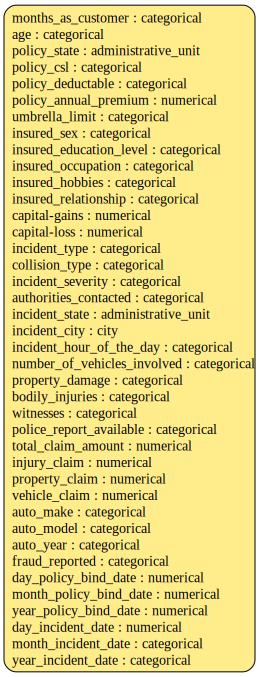

In [8]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data_train)
metadata.visualize()

In [9]:
from sdv.single_table import CTGANSynthesizer
model = CTGANSynthesizer(
    cuda=True, metadata=metadata, epochs=100)
#     anonymize_fields={
#    'address': 'address',
#    'city': 'incident_city',

#     }

model.fit(data)

In [ ]:
new_data = model.sample(num_rows=1500)

In [11]:
new_data.fraud_reported.value_counts()

fraud_reported
N    1350
Y     450
Name: count, dtype: int64

In [12]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 40/40 [00:00<00:00, 2949.79it/s]|
Data Validity Score: 99.98%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 499.80it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.99%



In [13]:
from sdv.evaluation.single_table import evaluate_quality

quality_report=evaluate_quality(real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 991.01it/s]|
Column Shapes Score: 87.83%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:02<00:00, 354.30it/s]|
Column Pair Trends Score: 79.92%

Overall Score (Average): 83.87%



In [14]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,months_as_customer,TVComplement,0.970812
1,age,TVComplement,0.932745
2,policy_csl,TVComplement,0.941128
3,policy_deductable,TVComplement,0.912347
4,policy_annual_premium,KSComplement,0.622156
5,umbrella_limit,TVComplement,0.972131
6,insured_sex,TVComplement,0.894262
7,insured_education_level,TVComplement,0.916012
8,insured_occupation,TVComplement,0.897496
9,insured_hobbies,TVComplement,0.905166


In [15]:
data_train.fraud_reported.value_counts()

fraud_reported
N    511
Y    159
Name: count, dtype: int64

In [16]:
from sklearn.utils import shuffle
gan_data_fraud=new_data[new_data.fraud_reported=="Y"]
data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)

# data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)
data_train = shuffle(data_train, random_state=42)
data_train.fraud_reported.value_counts()



fraud_reported
Y    609
N    511
Name: count, dtype: int64

In [ ]:
data_train.fraud_reported.tail

In [ ]:
x_train=data_train.drop('fraud_reported',axis=1)
y_train=data_train['fraud_reported']

# x_test=data_test.drop('fraud_reported',axis=1)
# y_test=data_test['fraud_reported']

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict

In [ ]:
y_train.value_counts()

In [ ]:
x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']

In [ ]:
label_encoders = {}
for column in category_columns:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_train[column] = label_encoder.fit_transform(x_train[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_train

In [ ]:
x_train.to_excel(f'{save_dir}/x_train.xlsx', index=False)
y_train.to_excel(f'{save_dir}/y_train.xlsx', index=False)

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"+ X_train: {len(x_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

In [ ]:
object_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
numeric_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
# for column in outliers_list:
#     data_test = remove_outliers_iqr(data_test, column)
# data_test['collision_type'].replace('?',np.nan,inplace=True)
# data_test['collision_type'].fillna(method='ffill',inplace=True)
# data_test[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
# (data_test=='?').sum()
label_encoders = {}
for column in object_cols_test:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_test[column] = label_encoder.fit_transform(x_test[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_test[numeric_cols_test] = scaler.fit_transform(x_test[numeric_cols_test])

x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']
data_test.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)
x_test.to_excel(f'{save_dir}/x_test.xlsx', index=False)
y_test.to_excel(f'{save_dir}/y_test.xlsx', index=False)